# Pre-Made Recommendation Model

# 1. Import Necessary Libraries and Dataset

In [ ]:
!pip install scikit-surprise
import surprise
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
import pandas as pd
from surprise import SVD, SVDpp, SlopeOne, NMF, NormalPredictor
from surprise import KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import KFold
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from plotly.offline import init_notebook_mode, plot, iplot
from timeit import default_timer as timer
import plotly.graph_objs as go

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd /content/gdrive/My Drive/SINA Project

/content/gdrive/My Drive/SINA Project


In [ ]:
!ls

movie-rating-utility-matrix.csv  movies.csv  ratings.csv  user.csv


# 2. Data Exploration

In [ ]:
df = pd.read_csv('ratings.csv')

In [ ]:
df.head(10)

,userId,movieId,rating,timestamp
0,196,242,3,1970-01-01
1,186,302,3,1970-01-01
2,22,377,1,1970-01-01
3,244,51,2,1970-01-01
4,166,346,1,1970-01-01
5,298,474,4,1970-01-01
6,115,265,2,1970-01-01
7,253,465,5,1970-01-01
8,305,451,3,1970-01-01
9,6,86,3,1970-01-01


In [ ]:
df = df.drop('timestamp', axis=1)

In [ ]:
data = df['rating'].value_counts().sort_index(ascending=False)
trace = go.Bar(x=data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / df.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               )
#Create Layout
layout = dict(title = 'Distribution Of {} movie-ratings'.format(df.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [ ]:
# Number of ratings per book
data = df.groupby('movieId')['rating'].count().clip(upper=50)

# Create trace
trace = go.Histogram(x = data.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 100,
                                  size = 2))
# Create layout
layout = go.Layout(title = 'Distribution Of Number of Ratings Per Movies (Clipped at 100)',
                   xaxis = dict(title = 'Number of Ratings Per Movies'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [ ]:
# Number of ratings per user
data = df.groupby('userId')['rating'].count().clip(upper=50)

# Create trace
trace = go.Histogram(x = data.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 50,
                                  size = 2))
# Create layout
layout = go.Layout(title = 'Distribution Of Number of Ratings Per User (Clipped at 50)',
                   xaxis = dict(title = 'Ratings Per User'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

# 3. Modelling





In [ ]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(df, reader)

## 3.1. Benchmark Models and Evaluation

In [ ]:
# Ketemu codenya di medium but im not sure? Does this code use all
# of the machine learning models in the table and get their rmse or what??
# But will plot the result and train 6 of them one by one.

benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
bench = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')   

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


In [ ]:
bench = bench.drop(index = ['SlopeOne','KNNWithZScore', 'CoClustering'])

In [ ]:
bench = bench.drop(index='KNNBasic')

In [ ]:
bench.head(11)

,test_rmse,fit_time,test_time
Algorithm,,,
SVDpp,0.927536,117.647944,5.913333
KNNBaseline,0.935208,0.376959,6.157082
SVD,0.943923,3.983718,0.297792
BaselineOnly,0.947564,0.148332,0.237002
KNNWithMeans,0.958164,0.259064,5.320404
NMF,0.974210,4.339105,0.271510
NormalPredictor,1.520336,0.107745,0.292052


In [ ]:
bench['average'] = bench.mean(numeric_only=True, axis=1)

In [ ]:
bplot = bench.drop(index=['SVDpp','KNNBaseline'])

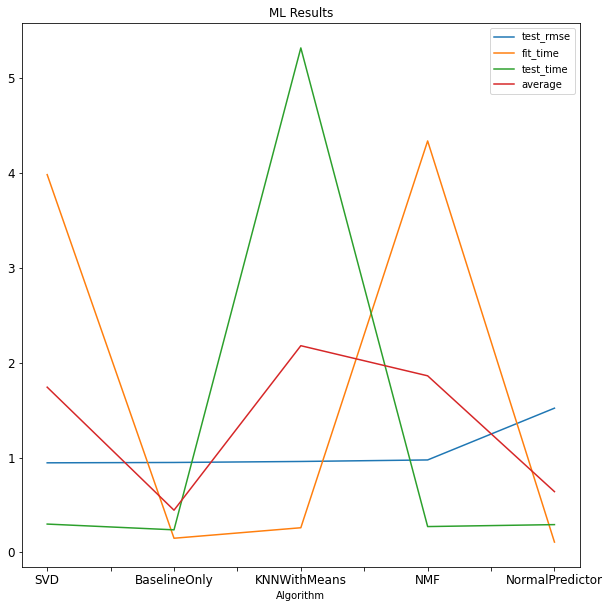

In [ ]:
bplot.plot(title='ML Results',figsize=(10,10), fontsize=12)

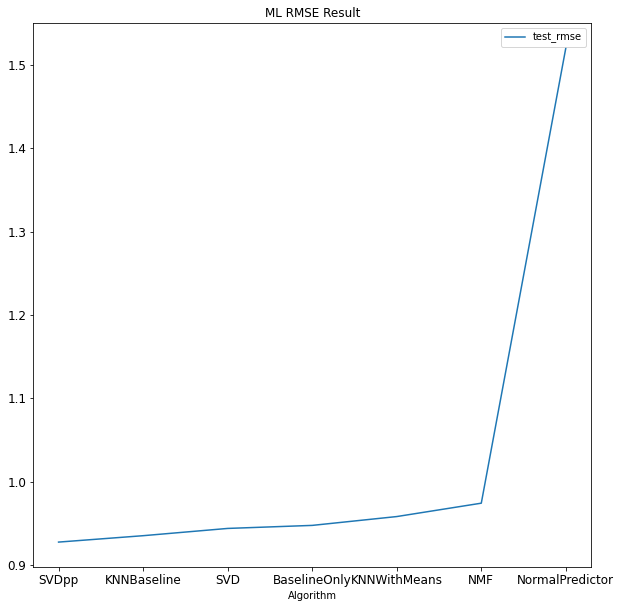

In [ ]:
bench.plot(y=['test_rmse'], title= 'ML RMSE Result', figsize=(10,10), fontsize=12)

The best performance goes from left to right.

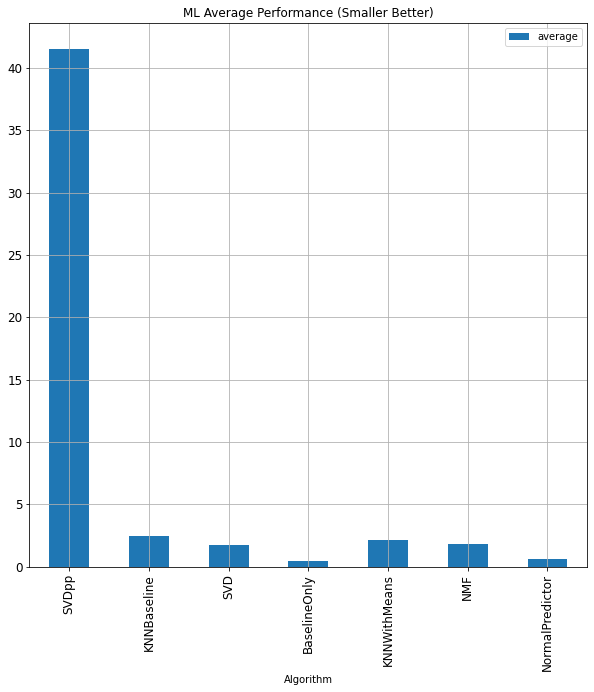

In [ ]:
bench.plot(y=['average'], title= 'ML Average Performance (Smaller Better)', figsize=(10,10), fontsize=12, kind='bar', grid=1)

The chart shows their general performance in general. For example SVDpp performance is so bad because its fit and test time are exceptionally high eventhough its the most accurate machine learning model.

Meanwhile the best model is the BaselineOnly, because it is fairly accurate, have a really fast fit and test time.

## 3.2. Train Test Split Evaluation

Results are really similar with benchmark modelling.

In [ ]:
trainset, testset = train_test_split(data, test_size=.25)

### 3.2.1. SVD

In [ ]:
SVDalgo = SVD()
SVDalgo.fit(trainset)
predictions = SVDalgo.test(testset)

In [ ]:
SVDrmse = accuracy.rmse(predictions)
start = timer()
end = timer()
SVDtime = end-start
print('SVD computation time is', SVDtime, 'seconds')

RMSE: 0.9456
SVD computation time is 2.3378001060336828e-05 seconds


### 3.2.2. SVDpp

In [ ]:
SVDppalgo = SVDpp()
SVDppalgo.fit(trainset)
predictions = SVDppalgo.test(testset)

In [ ]:
SVDpprmse = accuracy.rmse(predictions)
start = timer()
end = timer()
SVDpptime = end-start
print('SVDpp computation time is', SVDpptime, 'seconds')

RMSE: 0.9276
SVDpp computation time is 1.7889000446302816e-05 seconds


### 3.2.3. KNN Baseline

In [ ]:
KNNbalgo = KNNBaseline()
KNNbalgo.fit(trainset)
predictions = KNNbalgo.test(testset)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


In [ ]:
KNNbrmse = accuracy.rmse(predictions)
start = timer()
end = timer()
KNNbtime = end-start
print('KNN Baseline computation time is', KNNbtime, 'seconds')

RMSE: 0.9389
KNN Baseline computation time is 3.3385000278940424e-05 seconds


### 3.2.4. KNN With Means

In [ ]:
KNNWMalgo = KNNWithMeans()
KNNWMalgo.fit(trainset)
predictions = KNNWMalgo.test(testset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [ ]:
KNNWMrmse = accuracy.rmse(predictions)
start = timer()
end = timer()
KNNWMtime = end-start
print('KNN With Means computation time is', KNNWMtime, 'seconds')

RMSE: 0.9590
KNN With Means computation time is 3.385799936950207e-05 seconds


### 3.2.5. NMF

In [ ]:
NMFalgo = NMF()
NMFalgo.fit(trainset)
predictions = NMFalgo.test(testset)

In [ ]:
NMFrmse = accuracy.rmse(predictions)
start = timer()
end = timer()
NMFtime = end-start
print('NMF computation time is', NMFtime, 'seconds')

RMSE: 0.9797
NMF computation time is 5.338699702406302e-05 seconds


### 3.2.6. Normal Predictor

In [ ]:
NPalgo = NormalPredictor()
NPalgo.fit(trainset)
predictions = NPalgo.test(testset)

In [ ]:
NPrmse = accuracy.rmse(predictions)
start = timer()
end = timer()
NPtime = end-start
print('Normal Predictor computation time is', NPtime, 'seconds')

RMSE: 1.5244
Normal Predictor computation time is 1.9417002476984635e-05 seconds


### 3.2.7. BaselineOnly

In [ ]:
BOalgo = BaselineOnly()
BOalgo.fit(trainset)
predictions = BOalgo.test(testset)

Estimating biases using als...


In [ ]:
BOrmse = accuracy.rmse(predictions)
start = timer()
end = timer()
BOtime = end-start
print('Baseline Only computation time is', BOtime, 'seconds')

RMSE: 0.9499
Baseline Only computation time is 1.8439000996295363e-05 seconds


## 3.3. Recall Accuracy

In [ ]:
from collections import defaultdict

def precision_recall_at_k(predictions, k=10, threshold=3):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

### 3.3.1. SVD

In [ ]:
kf = KFold(n_splits=5)
algo = SVD()

for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=10, threshold=3)

    # Precision and recall can then be averaged over all users
    precision = sum(prec for prec in precisions.values()) / len(precisions)
    recall = sum(rec for rec in recalls.values()) / len(recalls)
    print(precision)
    print(recall)

0.9129483748253611
0.6397765279894618
0.9088544299531538
0.637086656845754
0.9079014690982761
0.63206783986309
0.9129052505644841
0.6273255742839416
0.9028137758127065
0.6320851178728881


In [ ]:
SVDprec = mean(precision)
SVDrec = mean(recall)
print(SVDprec)
print(SVDrec)

0.8994554697099749
0.6342460330021193


### 3.3.2. SVDpp

In [ ]:
kf = KFold(n_splits=5)
algo = SVDpp()

for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=10, threshold=3)

    # Precision and recall can then be averaged over all users
    precision = sum(prec for prec in precisions.values()) / len(precisions)
    recall = sum(rec for rec in recalls.values()) / len(recalls)
    print(precision)
    print(recall)

0.9082045649649029
0.6313927626720081
0.9241324721377899
0.6348543452001648
0.9192428756585685
0.6350658998946386
0.9095774231678467
0.6335989587123789
0.9136493598502086
0.6331723128648713


In [ ]:
SVDppprec = mean(precision)
SVDpprec = mean(recall)
print(SVDppprec)
print(SVDpprec)

0.9096889428099596
0.6367540399085935


### 3.3.3. KNN Baseline

In [ ]:
kf = KFold(n_splits=5)
algo = KNNBaseline()

for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=10, threshold=3)

    # Precision and recall can then be averaged over all users
    precision = sum(prec for prec in precisions.values()) / len(precisions)
    recall = sum(rec for rec in recalls.values()) / len(recalls)
    print(precision)
    print(recall)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
0.9092620646703341
0.6419495725715625
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
0.9074639364406045
0.6487264392388882
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
0.9107957615670352
0.6447714251604653
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
0.9073496950089295
0.6431931204011444
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
0.9083063441458753
0.6366984761039818


In [ ]:
KNNBprec = mean(precision)
KNNBrec = mean(recall)
print(KNNBprec)
print(KNNBrec)

0.914468016551348
0.6456501680190417


### 3.3.4. KNN With Means

In [ ]:
kf = KFold(n_splits=5)
algo = KNNWithMeans()

for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=10, threshold=3)

    # Precision and recall can then be averaged over all users
    precision = sum(prec for prec in precisions.values()) / len(precisions)
    recall = sum(rec for rec in recalls.values()) / len(recalls)
    print(precision)
    print(recall)

Computing the msd similarity matrix...
Done computing similarity matrix.
0.9142478010312387
0.6008321860041708
Computing the msd similarity matrix...
Done computing similarity matrix.
0.906680667307658
0.6014498144031704
Computing the msd similarity matrix...
Done computing similarity matrix.
0.9096008180578684
0.6125834904036732
Computing the msd similarity matrix...
Done computing similarity matrix.
0.90747860007414
0.6119262483449077
Computing the msd similarity matrix...
Done computing similarity matrix.
0.914742779631313
0.6139877789168138


In [ ]:
KNNWMprec = mean(precision)
KNNWMrec = mean(recall)
print(KNNWMprec)
print(KNNWMrec)

0.9105019714892306
0.6153686510321354


### 3.3.5. NMF

In [ ]:
kf = KFold(n_splits=5)
algo = NMF()

for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=10, threshold=3)

    # Precision and recall can then be averaged over all users
    precision = sum(prec for prec in precisions.values()) / len(precisions)
    recall = sum(rec for rec in recalls.values()) / len(recalls)
    print(precision)
    print(recall)

0.8913279132791309
0.6083352780671055
0.901150793650791
0.6045620070564105
0.9057428167449354
0.6135980174418877
0.9103195666093745
0.6076782621895872
0.9061681019925684
0.6073817813146207


In [ ]:
NMFprec = mean(precision)
NMFrec = mean(recall)
print(NMFprec)
print(NMFrec)

0.908609972504764
0.6100057726734884


### 3.3.6. Normal Predictor

In [ ]:
kf = KFold(n_splits=5)
algo = NormalPredictor()

for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=10, threshold=3)

    # Precision and recall can then be averaged over all users
    precision = sum(prec for prec in precisions.values()) / len(precisions)
    recall = sum(rec for rec in recalls.values()) / len(recalls)
    print(precision)
    print(recall)

0.8259703456302803
0.5203291370213227
0.8398332489023969
0.5255979957250537
0.845647544984765
0.5186456673765159
0.8377303943846875
0.512384732696135
0.8347508677922677
0.5270211372428211


In [ ]:
NPprec = mean(precision)
NPrec = mean(recall)
print(NPprec)
print(NPrec)

0.8416561463751269
0.5268406581208701


### 3.3.7. Baseline Only

In [ ]:
kf = KFold(n_splits=5)
algo = BaselineOnly()

for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=10, threshold=3)

    # Precision and recall can then be averaged over all users
    precision = sum(prec for prec in precisions.values()) / len(precisions)
    recall = sum(rec for rec in recalls.values()) / len(recalls)
    print(precision)
    print(recall)

Estimating biases using als...
0.9025167417303429
0.6556783717438142
Estimating biases using als...
0.9037462508003886
0.649451361691886
Estimating biases using als...
0.8988419951756809
0.6489798523237253
Estimating biases using als...
0.9024614127321112
0.6474800331871207
Estimating biases using als...
0.898553819971015
0.6481813250975544


In [ ]:
BOprec = mean(precision)
BOrec = mean(recall)
print(BOprec)
print(BOrec)

0.9026325977545469
0.6591724083672234


## 3.4. Precision and recall visualisation

In [ ]:
precall = [['SVD', SVDprec, SVDrec], ['SVDpp', SVDppprec, SVDpprec], ['KNNBaseline', KNNBprec, KNNBrec],
           ['KNNWithMeans', KNNWMprec, KNNWMrec], ['NMF', NMFprec, NMFrec], ['Normal Prediction', NPprec,NPrec],
           ['Baseline Only', BOprec,BOrec]]

In [ ]:
dfresult = pd.DataFrame(precall, columns = ['Algorithm','AVG Precision', 'AVG Recall'])

In [ ]:
dfresult['AVG'] = dfresult.mean(numeric_only=True, axis=1)

In [ ]:
dfresult.head(8)

,Algorithm,AVG Precision,AVG Recall,AVG
0,SVD,0.899455,0.634246,0.766851
1,SVDpp,0.909689,0.636754,0.773221
2,KNNBaseline,0.914468,0.645650,0.780059
3,KNNWithMeans,0.910502,0.615369,0.762935
4,NMF,0.908610,0.610006,0.759308
5,Normal Prediction,0.841656,0.526841,0.684248
6,Baseline Only,0.902633,0.659172,0.780903


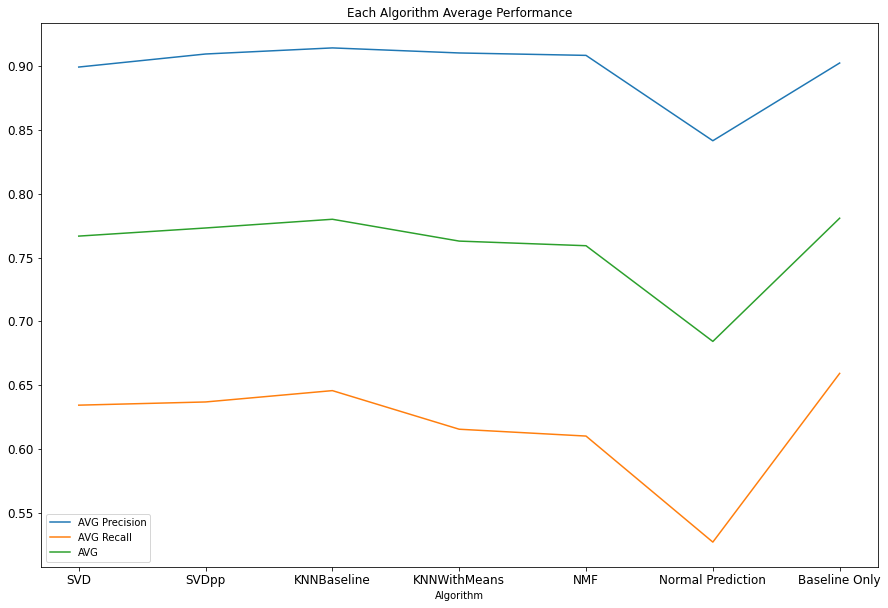

In [ ]:
dfresult.plot(x='Algorithm', title='Each Algorithm Average Performance',figsize=(15,10), fontsize=12)